# Relatório de Inteligência Empresarial

## Resumo
Este relatório responde a perguntas sobre vendas e desempenho de clientes, categorias e países. Os dados foram processados a partir de quatro arquivos CSV fornecidos:

- Fornecedores.csv - Dados de fornecedores
- Transportadoras.csv - Dados de transportadoras
- VendasGlobais.csv - Dados detalhados de vendas
- Vendedores.csv - Dados de vendedores

## Ferramentas Utilizadas
- Python: Linguagem principal
- Pandas: Biblioteca para manipulação de dados
- Matplotlib: Biblioteca para criação de gráficos
- Seaborn: Biblioteca para estilização dos gráficos

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando os arquivos CSV
fornecedores = pd.read_csv('Fornecedores.csv')
transportadoras = pd.read_csv('Transportadoras.csv')
vendas = pd.read_csv('VendasGlobais.csv')
vendedores = pd.read_csv('Vendedores.csv')

# Verificar os primeiros registros de cada arquivo para garantir que foram carregados corretamente
print(fornecedores.head())
print(transportadoras.head())
print(vendas.head())
print(vendedores.head())

# Configuração de estilo para os gráficos
sns.set(style="whitegrid")


   FornecedorID    FornecedorNome
0             1         USA Jeans
1             2     Global Outlet
2             3          Netshoes
3             4        All Sports
4             5  Tuxedo Beachwear
   TransportadoraID TransportadoraNome
0                 1   General Shipping
1                 2     Global Express
2                 3    Great Logistics
   PedidoID  CategoriaID  CategoriaNome CategoriaDescrição  ClienteID  \
0   10413.0          1.0  Men´s Clothes    Fashion for Men       41.0   
1   10500.0          2.0    Womens wear  Fashion for Women       41.0   
2   10832.0          2.0    Womens wear  Fashion for Women       41.0   
3   10923.0          2.0    Womens wear  Fashion for Women       41.0   
4   10413.0          2.0    Womens wear  Fashion for Women       41.0   

             ClienteNome ClienteContato ClienteCidade ClientePaísID  \
0  Elle Fashion & Design    Louise Davu      Toulouse           FRA   
1  Elle Fashion & Design    Louise Davu      Toulouse      

## Pergunta 1: Quem são os meus 10 maiores clientes, em termos de vendas ($)?

ClienteID  ClienteNome     
63.0       Grunewald           201320.4531
19.0       Th Fashing          152114.7892
37.0       Boleros             131133.1451
23.0       Champes              91362.1350
32.0       The Corner Store     82519.8235
1.0        Eintrach GS          75153.5245
80.0       Don Balón            68265.6625
44.0       Warp AG              65815.9770
73.0       Rode & Vite          59976.9277
79.0       Boombastic           50922.4655
Name: Vendas, dtype: float64


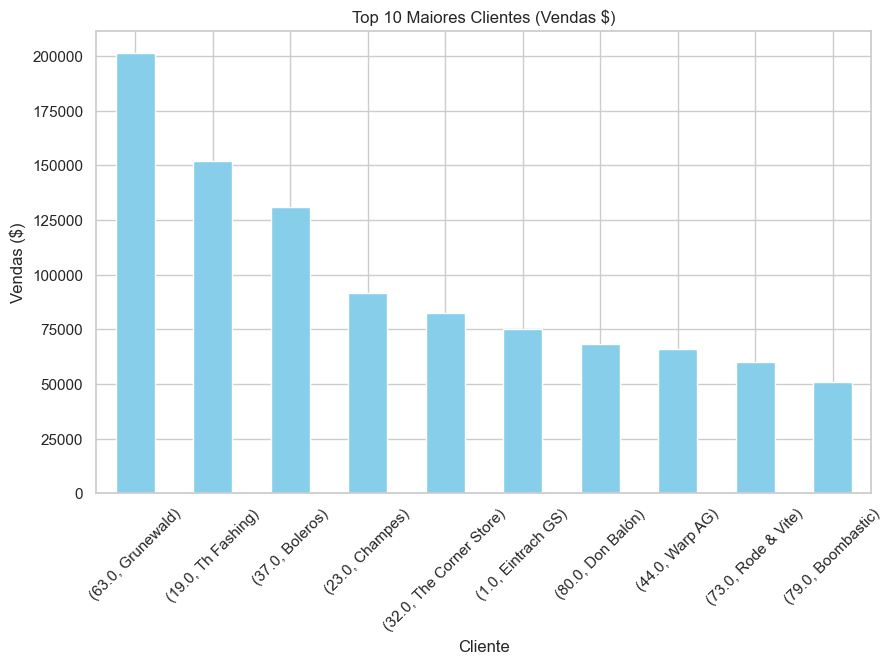

In [19]:
# Agrupar por ClienteID e ClienteNome, somando as vendas
top_clientes = vendas.groupby(['ClienteID', 'ClienteNome'])['Vendas'].sum()
top_clientes = top_clientes.sort_values(ascending=False).head(10)
print(top_clientes)

# Visualizando os 10 maiores clientes
plt.figure(figsize=(10, 6))
top_clientes.plot(kind='bar', color='skyblue')
plt.title('Top 10 Maiores Clientes (Vendas $)')
plt.xlabel('Cliente')
plt.ylabel('Vendas ($)')
plt.xticks(rotation=45)
plt.show()


## Pergunta 2: Quais os três maiores países, em termos de vendas ($)?

ClientePaís
Germany    519553.7336
USA        186313.2205
France     175565.3015
Name: Vendas, dtype: float64


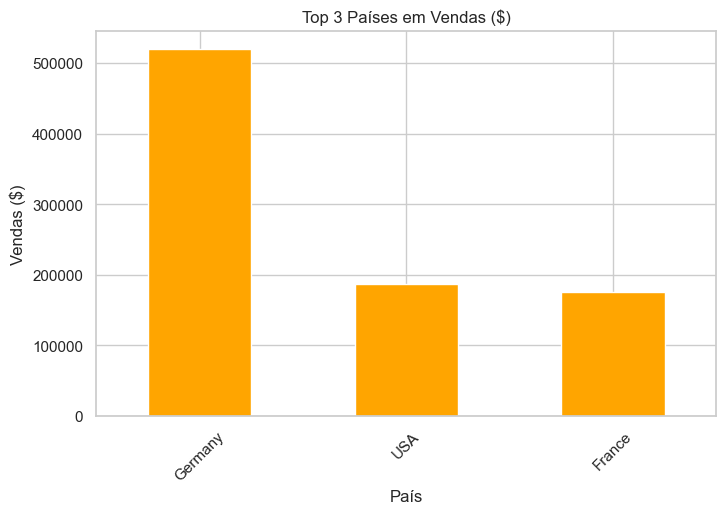

In [20]:
# Agrupar por ClientePaís e somar as vendas
top_paises = vendas.groupby('ClientePaís')['Vendas'].sum()
top_paises = top_paises.sort_values(ascending=False).head(3)
print(top_paises)

# Visualizando os 3 maiores países em termos de vendas
plt.figure(figsize=(8, 5))
top_paises.plot(kind='bar', color='orange')
plt.title('Top 3 Países em Vendas ($)')
plt.xlabel('País')
plt.ylabel('Vendas ($)')
plt.xticks(rotation=45)
plt.show()

## Pergunta 3: Quais as categorias de produtos que geram maior faturamento (vendas $) no Brasil?

CategoriaNome
Womens wear        60941.7265
Sportwear          19509.4255
Babywear           10367.2100
Men´s Footwear      9467.7425
Ladies´Footwear     7798.5190
Men´s Clothes       6158.0640
Bath Clothes        3407.7050
Children´s wear     2752.4250
Name: Vendas, dtype: float64


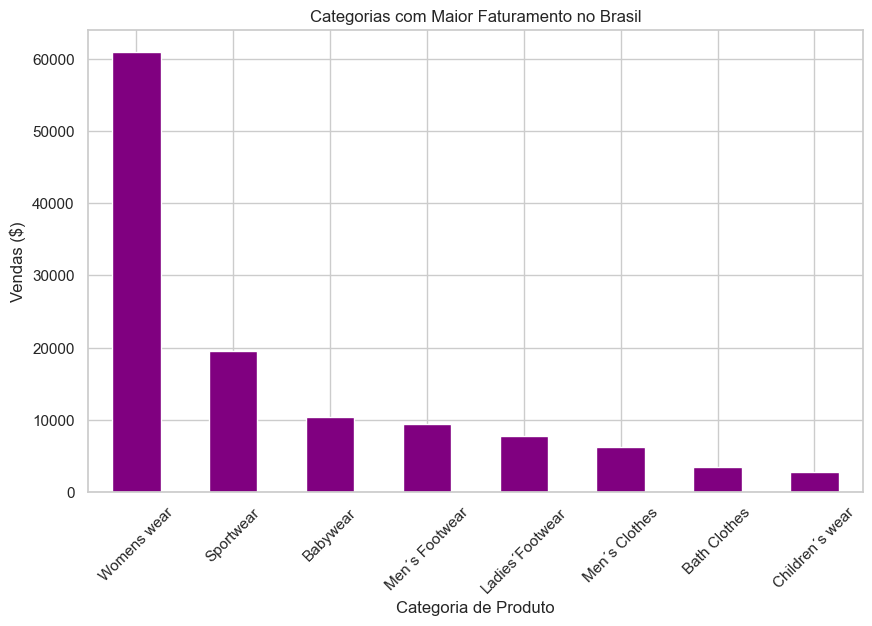

In [21]:
# Filtrar para o Brasil e agrupar por CategoriaNome
vendas_brasil = vendas[vendas['ClientePaís'] == 'Brazil']
categoria_faturamento_brasil = vendas_brasil.groupby('CategoriaNome')['Vendas'].sum()
categoria_faturamento_brasil = categoria_faturamento_brasil.sort_values(ascending=False)
print(categoria_faturamento_brasil)

# Visualizando categorias de produtos mais rentáveis no Brasil
plt.figure(figsize=(10, 6))
categoria_faturamento_brasil.plot(kind='bar', color='purple')
plt.title('Categorias com Maior Faturamento no Brasil')
plt.xlabel('Categoria de Produto')
plt.ylabel('Vendas ($)')
plt.xticks(rotation=45)
plt.show()

## Pergunta 4: Qual a despesa com frete envolvendo cada transportadora?

  TransportadoraNome     Frete
0     Global Express  70897.82
1   General Shipping  19843.83
2    Great Logistics  18771.69


C:\Users\Administrator\AppData\Local\Temp\ipykernel_7288\3637204201.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=despesa_frete, x='TransportadoraNome', y='Frete', palette='viridis')


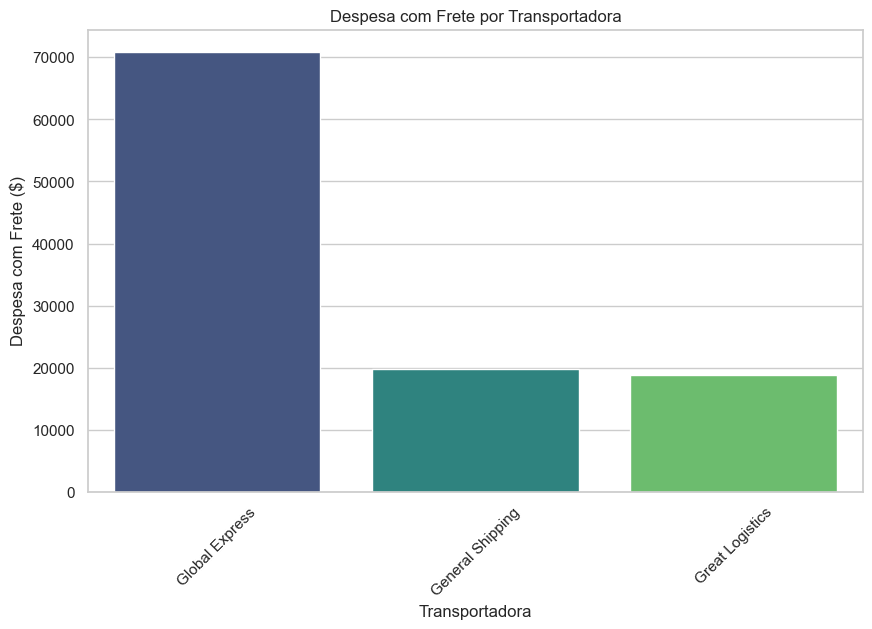

In [22]:
# Agrupar por TransportadoraID e somar as despesas de frete
despesa_frete = vendas.groupby('TransportadoraID')['Frete'].sum().sort_values(ascending=False)
# Mesclar com os nomes das transportadoras para tornar o resultado mais legível
despesa_frete = despesa_frete.reset_index().merge(transportadoras, on='TransportadoraID')
print(despesa_frete[['TransportadoraNome', 'Frete']])

# Visualizando a despesa com frete por transportadora
plt.figure(figsize=(10, 6))
sns.barplot(data=despesa_frete, x='TransportadoraNome', y='Frete', palette='viridis')
plt.title('Despesa com Frete por Transportadora')
plt.xlabel('Transportadora')
plt.ylabel('Despesa com Frete ($)')
plt.xticks(rotation=45)
plt.show()

## Pergunta 5: Quais são os principais clientes (vendas $) do segmento “Calçados Masculinos” (Men’s Footwear) na Alemanha?

ClienteID  ClienteNome       
63.0       Grunewald             20488.4850
17.0       Gluderstedt           11923.3485
79.0       Boombastic            11235.9700
1.0        Eintrach GS           10377.8330
44.0       Warp AG                9085.7650
39.0       Noch Einmal GMBH       3030.7200
56.0       Casual Clothing        2602.5025
25.0       Halle Köln             1692.5580
6.0        Man Kleider            1108.0000
52.0       Kohl Industries AG      286.5600
Name: Vendas, dtype: float64


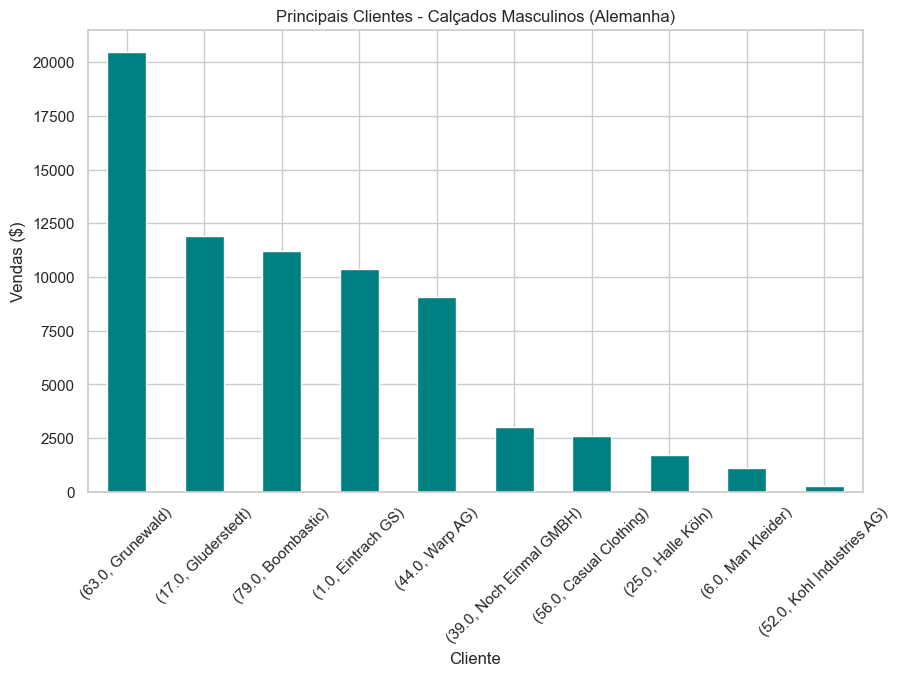

In [28]:
# Filtrar por categoria e país
segmento_footwear_ger = vendas[(vendas['CategoriaNome'] == "Men´s Footwear") & (vendas['ClientePaís'] == 'Germany')]
top_clientes_footwear_ger = segmento_footwear_ger.groupby(['ClienteID', 'ClienteNome'])['Vendas'].sum().sort_values(ascending=False)
print(top_clientes_footwear_ger)

# Visualizando principais clientes do segmento "Calçados Masculinos" na Alemanha
plt.figure(figsize=(10, 6))
top_clientes_footwear_ger.plot(kind='bar', color='teal')
plt.title('Principais Clientes - Calçados Masculinos (Alemanha)')
plt.xlabel('Cliente')
plt.ylabel('Vendas ($)')
plt.xticks(rotation=45)
plt.show()


## Pergunta 6: Quais os vendedores que mais dão descontos nos Estados Unidos?

     VendedorNome   Desconto
0    Gael Monfils  7415.1295
1  Yannick Sinner  1160.0540
2  Martina Hingis   733.7770
3      Cori Gauff   404.5500


C:\Users\Administrator\AppData\Local\Temp\ipykernel_7288\2379719108.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=descontos_vendedores, x='VendedorNome', y='Desconto', palette='coolwarm')


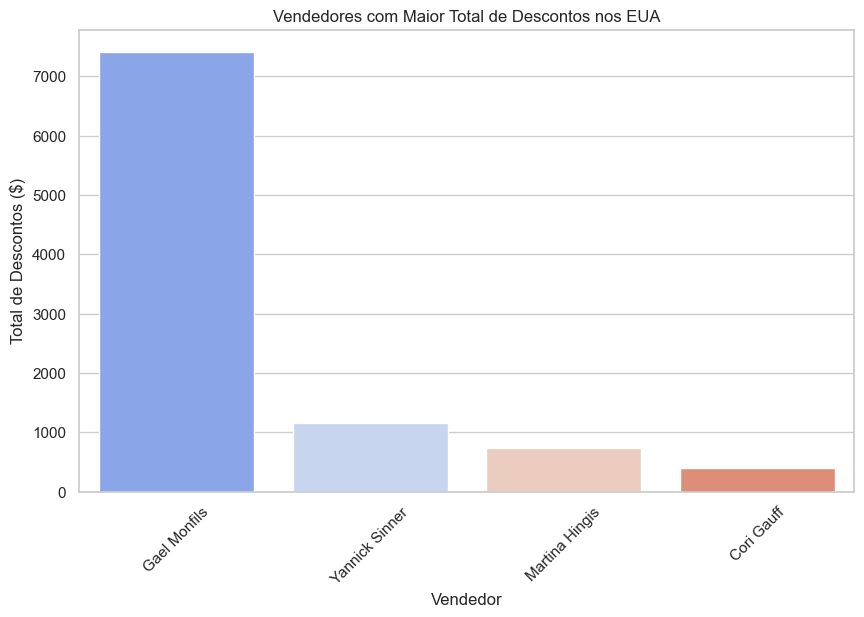

In [29]:
# Filtrar para os Estados Unidos e agrupar por VendedorID
descontos_usa = vendas[vendas['ClientePaís'] == 'USA']
descontos_vendedores = descontos_usa.groupby('VendedorID')['Desconto'].sum().sort_values(ascending=False)
# Mesclar com os nomes dos vendedores
descontos_vendedores = descontos_vendedores.reset_index().merge(vendedores, on='VendedorID')
print(descontos_vendedores[['VendedorNome', 'Desconto']])

# Visualizando vendedores com maiores descontos nos EUA
plt.figure(figsize=(10, 6))
sns.barplot(data=descontos_vendedores, x='VendedorNome', y='Desconto', palette='coolwarm')
plt.title('Vendedores com Maior Total de Descontos nos EUA')
plt.xlabel('Vendedor')
plt.ylabel('Total de Descontos ($)')
plt.xticks(rotation=45)
plt.show()


## Pergunta 7: Quais os fornecedores que dão a maior margem de lucro ($) no segmento de “Vestuário Feminino” (Womens wear)?

    FornecedorNome  Margem Bruta
0    Pälsii Sports    81839.9408
1       Baby Dress    20675.2166
2   Wills Surfwear    10019.1193
3   Great Outdoors     9165.0332
4    Global Outlet     4884.9949
5      L.A. Sports     2304.5883
6      Luis Vilton     2192.3847
7     Tennis Place     1845.2659
8         Netshoes     1810.7737
9        USA Jeans     1273.9987
10       Surf Trip      147.6087


C:\Users\Administrator\AppData\Local\Temp\ipykernel_7288\1016461423.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=margem_lucro_fornecedores, x='FornecedorNome', y='Margem Bruta', palette='plasma')


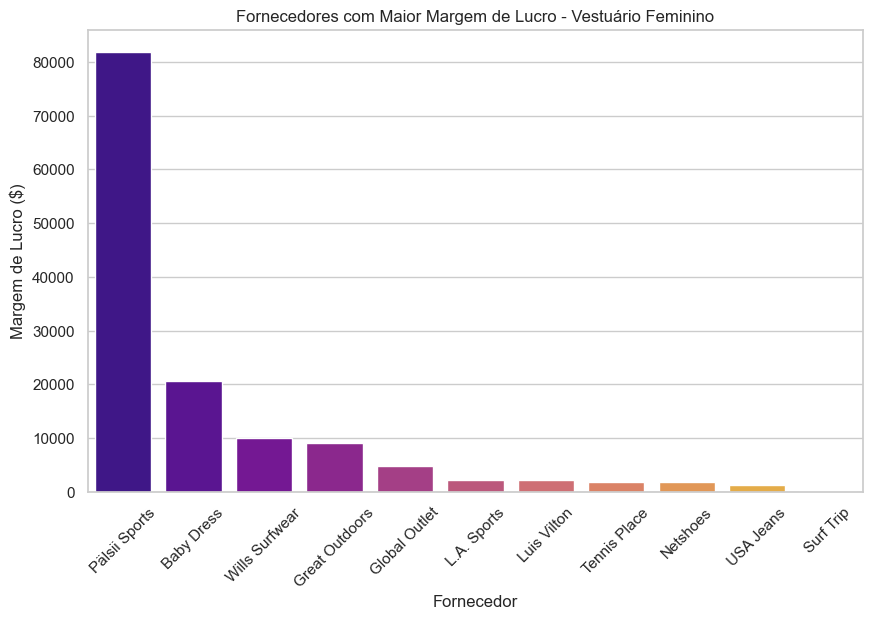

In [30]:
# Filtrar para o segmento desejado
segmento_womens_wear = vendas[vendas['CategoriaNome'] == "Womens wear"]
margem_lucro_fornecedores = segmento_womens_wear.groupby('FornecedorID')['Margem Bruta'].sum().sort_values(ascending=False)
# Mesclar com os nomes dos fornecedores
margem_lucro_fornecedores = margem_lucro_fornecedores.reset_index().merge(fornecedores, on='FornecedorID')
print(margem_lucro_fornecedores[['FornecedorNome', 'Margem Bruta']])

# Visualizando fornecedores com maior margem de lucro no segmento "Vestuário Feminino"
plt.figure(figsize=(10, 6))
sns.barplot(data=margem_lucro_fornecedores, x='FornecedorNome', y='Margem Bruta', palette='plasma')
plt.title('Fornecedores com Maior Margem de Lucro - Vestuário Feminino')
plt.xlabel('Fornecedor')
plt.ylabel('Margem de Lucro ($)')
plt.xticks(rotation=45)
plt.show()

## Pergunta 8: Quanto que foi vendido ($) no ano de 2009? Entre 2009 e 2012, o faturamento vem crescendo, se mantendo estável ou decaindo?

Total de vendas em 2009: $87666.294
Data
2009     87666.2940
2010    370788.5561
2011    641719.4091
2012    682973.4414
Name: Vendas, dtype: float64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_7288\3936702569.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  vendas['Data'] = pd.to_datetime(vendas['Data'])


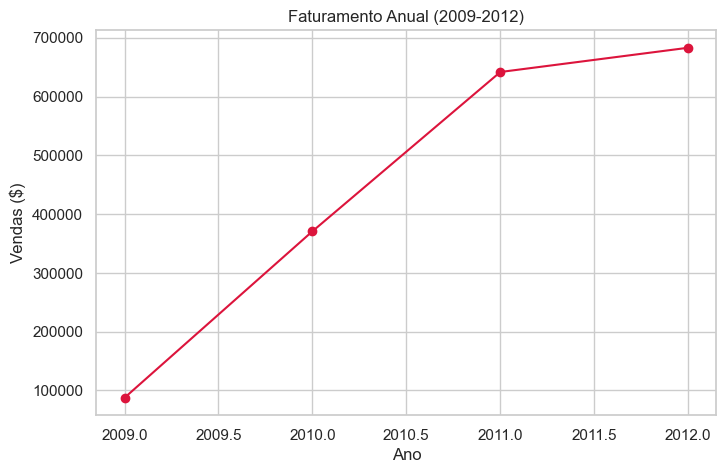

In [31]:
# Converter a coluna Data para o formato datetime
vendas['Data'] = pd.to_datetime(vendas['Data'])
# Filtrar as vendas do ano de 2009
vendas_2009 = vendas[vendas['Data'].dt.year == 2009]['Vendas'].sum()
print(f"Total de vendas em 2009: ${vendas_2009}")

# Análise de tendência entre 2009 e 2012
vendas_anos = vendas[(vendas['Data'].dt.year >= 2009) & (vendas['Data'].dt.year <= 2012)]
vendas_anuais = vendas_anos.groupby(vendas_anos['Data'].dt.year)['Vendas'].sum()
print(vendas_anuais)

# Visualizando o faturamento anual de 2009 a 2012
plt.figure(figsize=(8, 5))
vendas_anuais.plot(kind='line', marker='o', color='crimson')
plt.title('Faturamento Anual (2009-2012)')
plt.xlabel('Ano')
plt.ylabel('Vendas ($)')
plt.grid(True)
plt.show()

## Pergunta 9: Quais são os principais clientes (vendas $) do segmento “Calçados Masculinos” (Men’s Footwear) na Alemanha? PERGUNTA REPETIDA

## Pergunta 10: Quais os países nos quais mais se tiram pedidos (qtde total de pedidos)?

ClientePaís
Germany        491
USA            267
France         177
UK             163
Brazil         157
Ireland        140
Venezuela      121
Mexico         113
Denmark         92
Canada          87
Sweden          78
Austria         63
Spain           56
Italy           35
Argentina       27
Switzerland     26
Belgium         25
Portugal        21
Finland         16
Poland          16
Norway           1
Name: PedidoID, dtype: int64


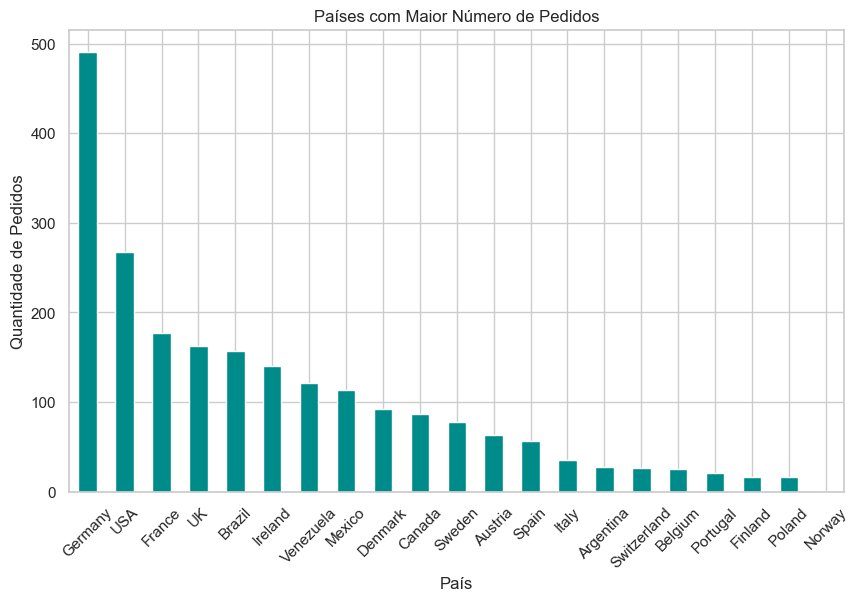

In [32]:
# Agrupar por ClientePaís e contar os pedidos
qtde_pedidos_pais = vendas.groupby('ClientePaís')['PedidoID'].count().sort_values(ascending=False)
print(qtde_pedidos_pais)

# Visualizando países com maior número de pedidos
plt.figure(figsize=(10, 6))
qtde_pedidos_pais.plot(kind='bar', color='darkcyan')
plt.title('Países com Maior Número de Pedidos')
plt.xlabel('País')
plt.ylabel('Quantidade de Pedidos')
plt.xticks(rotation=45)
plt.show()